In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import scipy.io as sio

from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/CSE512/HW5'

Mounted at /content/gdrive
/content/gdrive/My Drive/CSE512/HW5


In [2]:
data = sio.loadmat('mnist_binary_small.mat')
Xtrain = data['Xtrain']
Xtest = data['Xtest']
ytrain = data['ytrain'][0,:]
ytest = data['ytest'][0,:]
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(1958, 784) (1991, 784) (1958,) (1991,)


In [3]:
from sklearn.tree import DecisionTreeClassifier

def evaluate_stump(X, y, clf):
    predictions = clf.predict(X)
    misclassification_rate = np.mean(predictions != y)
    exponential_loss = np.mean(np.exp(-y * predictions))
    return misclassification_rate, exponential_loss

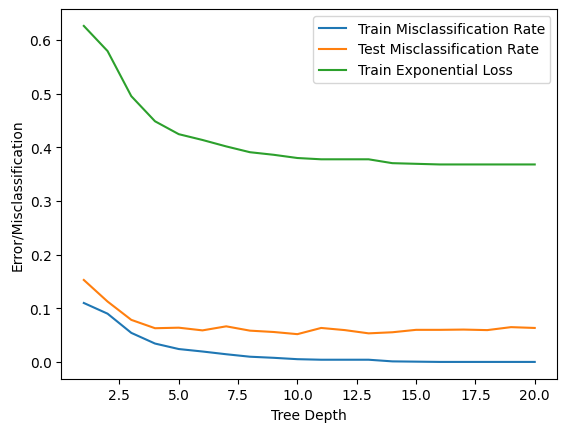

Minimum Train Misclassification Rate: 0.0
Minimum Test Misclassification Rate: 0.05173279758915118
Minimum Train Exponential Loss: 0.3678794411714424


In [26]:
train_misclass = []
test_misclass = []
train_loss = []

depths = range(1, 21)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(Xtrain, ytrain)
    train_mis, train_exp = evaluate_stump(Xtrain, ytrain, clf)
    test_mis, _ = evaluate_stump(Xtest, ytest, clf)

    train_misclass.append(train_mis)
    test_misclass.append(test_mis)
    train_loss.append(train_exp)

plt.plot(depths, train_misclass, label='Train Misclassification Rate')
plt.plot(depths, test_misclass, label='Test Misclassification Rate')
plt.plot(depths, train_loss, label='Train Exponential Loss')
plt.xlabel('Tree Depth')
plt.ylabel('Error/Misclassification')
plt.legend()
plt.show()

print(f"Minimum Train Misclassification Rate: {min(train_misclass)}")
print(f"Minimum Test Misclassification Rate: {min(test_misclass)}")
print(f"Minimum Train Exponential Loss: {min(train_loss)}")

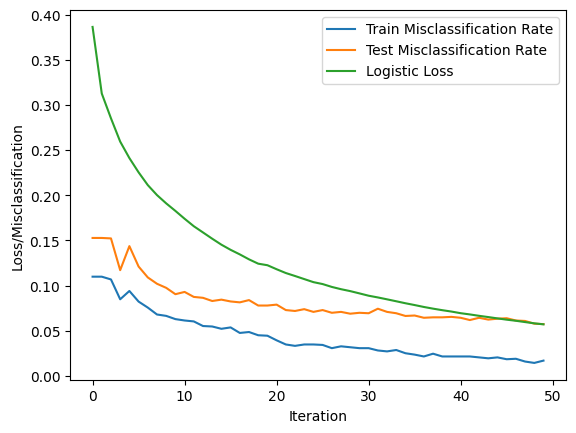

Minimum Train Misclassification Rate: 0.014300306435137897
Minimum Test Misclassification Rate: 0.05725765946760422
Minimum Train Exponential Loss: 0.05703536128888791


'\n# Train and test LogitBoost\nT = 50  # Number of boosting iterations\nH, weak_learners = logitboost(Xtrain, ytrain, T)\nlogistic_loss = np.mean(np.log(1 + np.exp(-ytrain * H)))\ntrain_preds = np.sign(H)\ntrain_error = np.mean(train_preds != ytrain)\n\ntest_H = sum(weak.predict(Xtest) for weak in weak_learners)\ntest_preds = np.sign(test_H)\ntest_error = np.mean(test_preds != ytest)\n\nprint(logistic_loss, train_error, test_error)\n'

In [27]:
from sklearn.tree import DecisionTreeRegressor

# LogitBoost implementation
def logitboost(X, y, T=50):
    m = len(y)
    H = np.zeros(m)
    test_H = np.zeros(len(ytest))
    weak_learners = []
    train_logistic_loss = []
    train_misclassification = []
    test_misclassification = []

    for t in range(T):
        p = 1 / (1 + np.exp(-H))
        p = np.clip(p, 1e-6, 1-1e-6)
        w = p * (1 - p)
        z = ((y + 1) / 2 - p) / (p * (1 - p))

        clf = DecisionTreeRegressor(max_depth=1)
        clf.fit(X, z, sample_weight=w)
        h = clf.predict(X)
        H += h*0.8
        train_logistic_loss.append(np.mean(np.log(1 + np.exp(-ytrain * H))))
        train_misclassification.append(np.mean(np.sign(H) != ytrain))

        test_H += clf.predict(Xtest)
        test_misclassification.append(np.mean(np.sign(test_H) != ytest))
    return train_misclassification, test_misclassification, train_logistic_loss

T = 50
train_misclassification, test_misclassification, train_logistic_loss= logitboost(Xtrain, ytrain, T)
plt.plot(range(T), train_misclassification, label="Train Misclassification Rate")
plt.plot(range(T), test_misclassification, label="Test Misclassification Rate")
plt.plot(range(T), train_logistic_loss, label="Logistic Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss/Misclassification")
plt.legend()
plt.show()

print(f"Minimum Train Misclassification Rate: {min(train_misclassification)}")
print(f"Minimum Test Misclassification Rate: {min(test_misclassification)}")
print(f"Minimum Train Exponential Loss: {min(train_logistic_loss)}")
'''
# Train and test LogitBoost
T = 50  # Number of boosting iterations
H, weak_learners = logitboost(Xtrain, ytrain, T)
logistic_loss = np.mean(np.log(1 + np.exp(-ytrain * H)))
train_preds = np.sign(H)
train_error = np.mean(train_preds != ytrain)

test_H = sum(weak.predict(Xtest) for weak in weak_learners)
test_preds = np.sign(test_H)
test_error = np.mean(test_preds != ytest)

print(logistic_loss, train_error, test_error)
'''

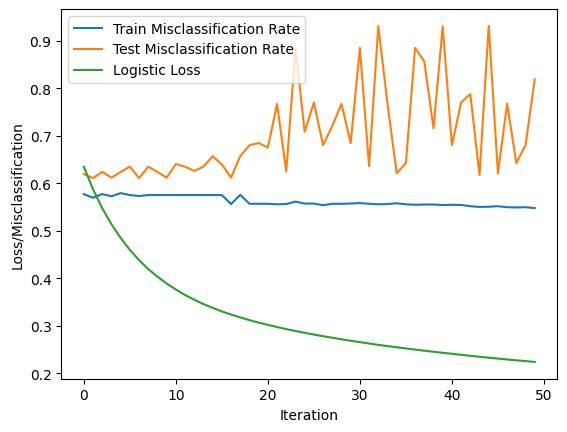

In [ ]:
# Not correct

def logitboost(X, y, T):
    m = len(y)
    H = np.zeros(m)
    w = np.ones(m) / m
    train_logistic_loss = []
    train_misclassification = []
    test_misclassification = []

    for t in range(T):
        p = 1 / (1 + np.exp(-H))
        p = np.clip(p, 1e-6, 1-1e-6)
        w = p * (1 - p)
        z = ((y + 1) / 2 - p) / (p * (1 - p))

        clf = DecisionTreeRegressor(max_depth=1)
        clf.fit(X, z, sample_weight=w)
        h_t = clf.predict(X)
        H += h_t * 0.1

        train_misclassification.append(np.mean((H > 0) != y))
        test_misclassification.append(np.mean((clf.predict(Xtest) > 0) != ytest))
        train_logistic_loss.append(np.mean(np.log(1 + np.exp(-y * H))))

    return train_misclassification, test_misclassification, train_logistic_loss

T = 50
train_misclassification, test_misclassification, train_logistic_loss= logitboost(Xtrain, ytrain, T)
plt.plot(range(T), train_misclassification, label="Train Misclassification Rate")
plt.plot(range(T), test_misclassification, label="Test Misclassification Rate")
plt.plot(range(T), train_logistic_loss, label="Logistic Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss/Misclassification")
plt.legend()
plt.show()